In [ ]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/SYN'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
!pip install powerlaw
from SYN_package.functions import *
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import powerlaw
import warnings

fatal: destination path 'thesis' already exists and is not an empty directory.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_labeled_data_unified_processed.csv')
fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_snews_processed.csv')
vo=pd.read_csv('/content/drive/MyDrive/thesis/data/voat/voat_processed.csv')
yt=pd.read_csv('/content/drive/MyDrive/thesis/data/youtube/processed_sample.csv')

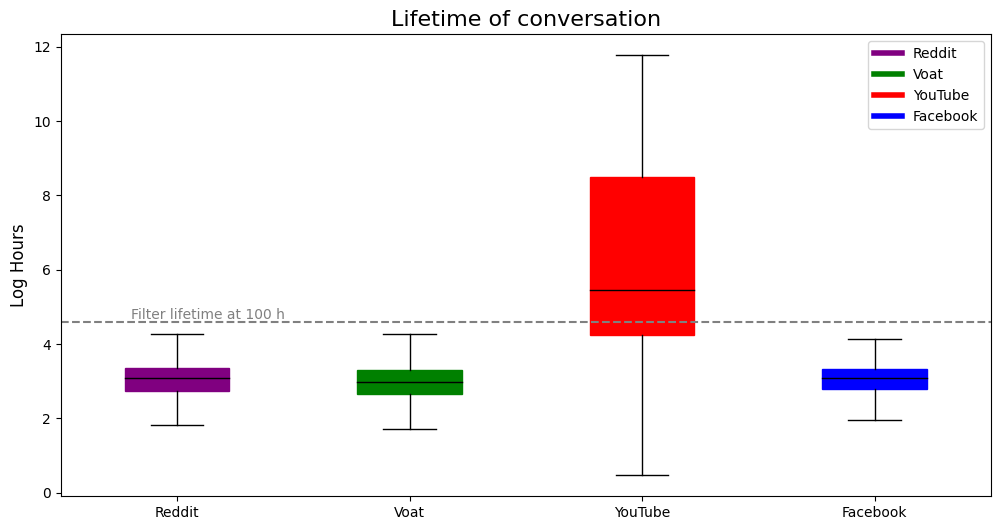

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dati di esempio per dimostrazione
# np.random.seed(0)
# fb = pd.DataFrame({'post_id': np.random.randint(0, 100, 1000), 'temporal_distance_birth_h': np.random.exponential(scale=100, size=1000)})
# rd = pd.DataFrame({'post_id': np.random.randint(0, 100, 1000), 'temporal_distance_birth_h': np.random.exponential(scale=100, size=1000)})
# yt = pd.DataFrame({'post_id': np.random.randint(0, 100, 1000), 'temporal_distance_birth_h': np.random.exponential(scale=100, size=1000)})
# vo = pd.DataFrame({'post_id': np.random.randint(0, 100, 1000), 'temporal_distance_birth_h': np.random.exponential(scale=100, size=1000)})

# Calcolare i dati per i boxplot
fb_data = np.log(fb.groupby(['post_id'])['temporal_distance_birth_h'].quantile(0.95).reset_index()['temporal_distance_birth_h'])
rd_data = np.log(rd.groupby(['post_id'])['temporal_distance_birth_h'].quantile(0.95).reset_index()['temporal_distance_birth_h'])
yt_data = np.log(yt.groupby(['post_id'])['temporal_distance_birth_h'].quantile(0.95).reset_index()['temporal_distance_birth_h'])
vo_data = np.log(vo.groupby(['post_id'])['temporal_distance_birth_h'].quantile(0.95).reset_index()['temporal_distance_birth_h'])

# Creare una figura e un unico subplot
plt.figure(figsize=(12, 6))
plt.title('Lifetime of conversation', fontsize=16)

# Creare i boxplot
colors = [ 'purple',  'green','red','blue']

box = plt.boxplot([ rd_data, vo_data,yt_data,fb_data], showfliers=False, patch_artist=True,
                  medianprops=dict(color='black'))

# Assegnare colori specifici ai boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(color)


# Aggiungere una legenda
plt.legend([plt.Line2D([0], [0], color=color, lw=4) for color in colors],
           [ 'Reddit',  'Voat','YouTube','Facebook'], loc='upper right')

# Etichette degli assi
plt.xticks([1, 2, 3, 4], [ 'Reddit',  'Voat','YouTube','Facebook'])
plt.ylabel('Log Hours', fontsize=12)

# Linea di riferimento
plt.axhline(y=np.log(100), color='gray', linestyle='--')
plt.text(0.8, np.log(100), 'Filter lifetime at 100 h', color='gray', fontsize=10, verticalalignment='bottom')

# Mostrare il grafico
plt.show()
# Mostrare il grafico
plt.show()
